## dataseet from kaggle :https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df= pd.read_csv(r"C:\Users\hp\Desktop\FuelConsumption (1).csv")
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [3]:
df.isna().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [4]:
df.columns

Index(['Year', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'COEMISSIONS '],
      dtype='object')

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()


In [6]:
numcols = df[['ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']]
numcols.head()


,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,1.6,4,10.5,216
1,1.6,4,9.8,205
2,3.2,6,13.7,265
3,3.5,6,15.0,301
4,1.8,4,11.4,230


In [7]:
from scipy.stats import zscore

z_scores = numcols.apply(zscore)

# Detect outliers (Threshold: Z-score > 3 or < -3)
outliers = (z_scores.abs() > 3)

# Replace outliers with the median
for col in numcols:
    df.loc[outliers[col], col] = df[col].median()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              638 non-null    int64  
 1   MAKE              638 non-null    object 
 2   MODEL             638 non-null    object 
 3   VEHICLE CLASS     638 non-null    object 
 4   ENGINE SIZE       638 non-null    float64
 5   CYLINDERS         638 non-null    int64  
 6   TRANSMISSION      638 non-null    object 
 7   FUEL              638 non-null    object 
 8   FUEL CONSUMPTION  638 non-null    float64
 9   COEMISSIONS       638 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 54.8+ KB


In [9]:
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [10]:
features = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']
target = 'COEMISSIONS '

X = df[features]
y = df[target]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
accuracy = r2_score(y_test, y_pred)



print(f"Model Mean Squared Error: {mse}")
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Model R² Accuracy: {accuracy:.4f}")

NameError: name 'StandardScaler' is not defined

In [ ]:
comparison_df = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(comparison_df.head(10))


   Actual   Predicted
0     304  309.480137
1     216  216.297216
2     292  290.645697
3     357  350.272440
4     267  272.455078
5     260  264.090586
6     228  227.969821
7     430  425.003523
8     359  350.333505
9     255  249.530364


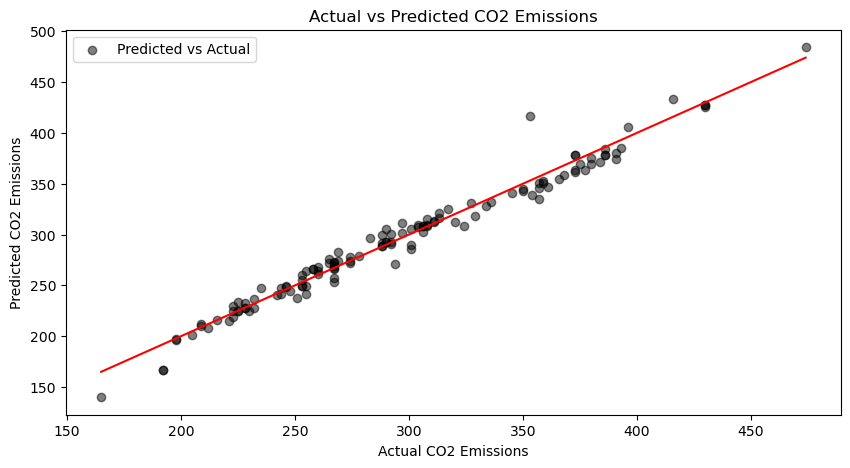

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='black', alpha=0.5, label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.legend()
plt.show()


## How does engine size affect CO2 emissions?

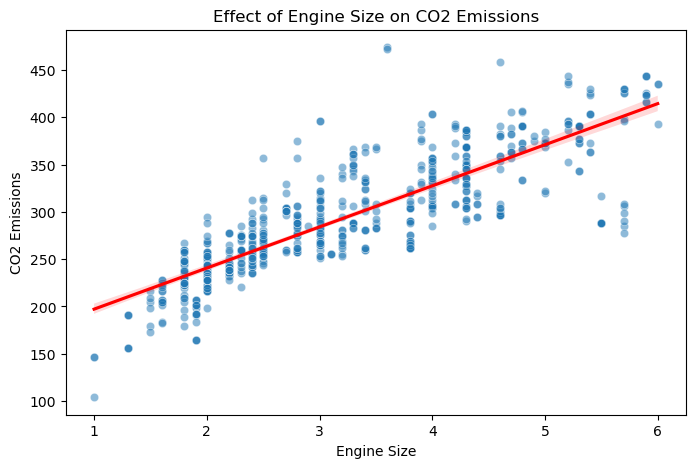

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["ENGINE SIZE"], y=df["COEMISSIONS "], alpha=0.5)
sns.regplot(x=df["ENGINE SIZE"], y=df["COEMISSIONS "], scatter=False, color="red")  # Regression trendline
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Effect of Engine Size on CO2 Emissions")
plt.show()


##  Does fuel consumption correlate with CO2 emissions?

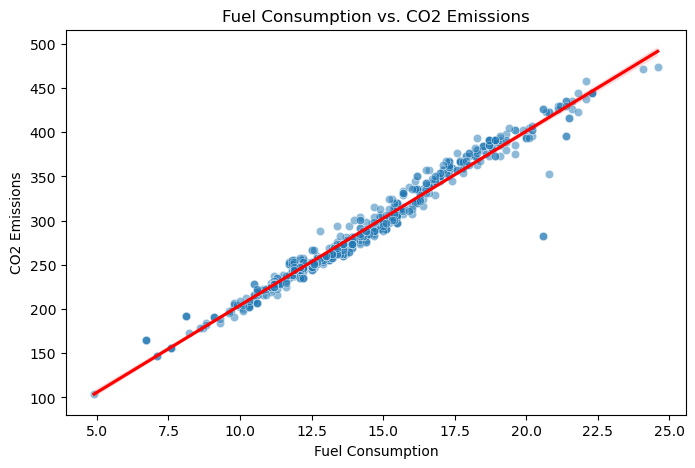

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Correcting the scatter plot
sns.scatterplot(x=df["FUEL CONSUMPTION"], y=df["COEMISSIONS "], alpha=0.5)

# Adding regression line
sns.regplot(x=df["FUEL CONSUMPTION"], y=df["COEMISSIONS "], scatter=False, color="red")

plt.xlabel("Fuel Consumption")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption vs. CO2 Emissions")
plt.show()


## what affects the Carbon dioxide Emissions the most

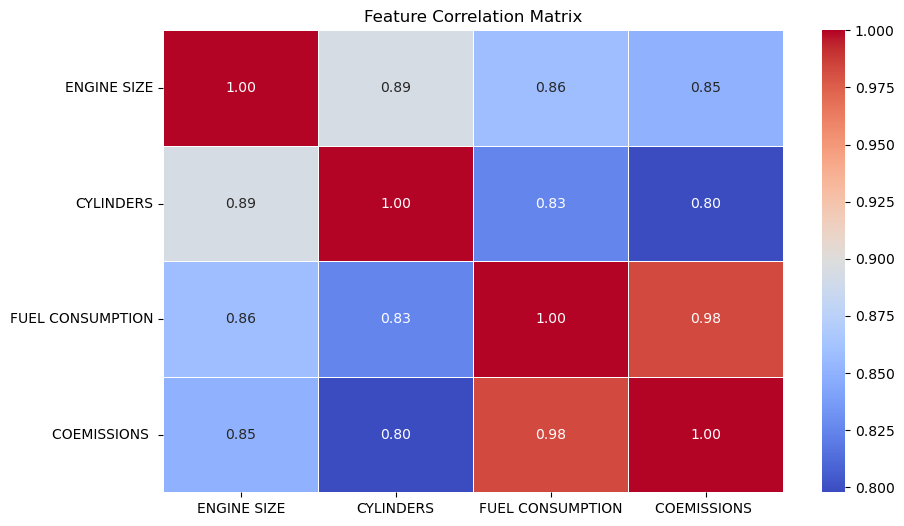

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Compute correlation matrix
corr_matrix = numcols.corr()

# Generate heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Matrix")
plt.show()
